In [2]:
# from random import *
# import time
# import math
# import sys
# import matplotlib.pyplot as plt
# import graphviz

#!{sys.executable} -m pip install graphviz

from helpers import *

In [5]:
# M = Z + Z x Cyc(M) => M = Z + Z x C, tC = S x tM, S = 1 + M x S 

cmax = 600 # à 700, on obtient inf...
cM = [0]
cC = [1]
cS = [1]

for i in range(1,cmax+1):
    cM.append(cC[i-1])
    cC.append(sum(cS[i-k] * k * cM[k]/i for k in range(1,i+1)))
    cS.append(sum(cS[i-k] * cM[k] for k in range(1,i+1)))

print(cM[:6])
print(cC[:6])
print(cS[:6])

[0, 1, 1.0, 1.5, 2.833333333333333, 6.083333333333333]
[1, 1.0, 1.5, 2.833333333333333, 6.083333333333333, 14.116666666666667]
[1, 1, 2.0, 4.5, 10.833333333333332, 27.249999999999996]


In [6]:
print(cmax,cM[cmax])

600 5.936434713651471e+293


In [7]:
# M = Z + Z x Cyc(M) => M = Z + Z x C, tC = S x tM, S = 1 + M x S 

def genM(n):
    if n == 1:
        return ['z'] # Z
    return ['z']+genC(n-1)

def uniform_cutC(n):
    u = random()
    k = 0
    s = 0
    while u > s:
        k += 1
        s += k * cM[k] * cS[n-k] / (n * cC[n])  # tC = S x tM
    return k

def genC(n):
    if n == 0:
        return []
    k = uniform_cutC(n)
    return [genM(k)] + genS(n-k)


def uniform_cutS(n):
    u = random()
    k = 0
    s = 0
    while u > s:
        k += 1
        s += cM[k] * cS[n-k] / cS[n]  # S = 1 + M x S 
    return k

def genS(n):
    if n == 0:
        return []
    k = uniform_cutS(n)
    return [genM(k)] + genS(n-k)

def genM_labelled(n):
    p = random_permutation(n)

    def aux(t):
        if t == ['z']:
            return [p.pop()]
        return [p.pop()] + [aux(tt) for tt in t[1:]]  # tri pour imposer l'ordre d'affichage
    return aux(genM(n))

['z', ['z', ['z']], ['z'], ['z'], ['z'], ['z', ['z', ['z']], ['z']]]


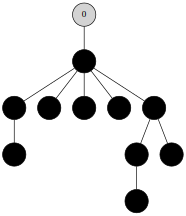

In [20]:
m = genM(10)
print(m)
draw_tree_unlabelled(m,3,3)

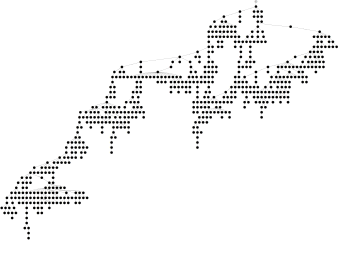

In [28]:
m = genM_labelled(cmax)
#print(m)
draw_tree_unlabelled(m,5,5)

In [10]:
count_occurences(lambda : genM_labelled(3),1000000)
print(100/9.)
#print(100/68.)

nb: 12
[2, [1, [3]]] 11.16
[1, [3, [2]]] 11.10
[3, [1], [2]] 5.55
[2, [3, [1]]] 11.10
[3, [2, [1]]] 11.06
[1, [2], [3]] 5.61
[2, [1], [3]] 5.51
[3, [2], [1]] 5.59
[1, [2, [3]]] 11.08
[3, [1, [2]]] 11.10
[1, [3], [2]] 5.57
[2, [3], [1]] 5.56
11.11111111111111


1 20 39 58 77 96 115 134 153 172 191 210 229 248 267 286 305 324 343 362 381 400 419 438 457 476 495 514 533 552 571 590 

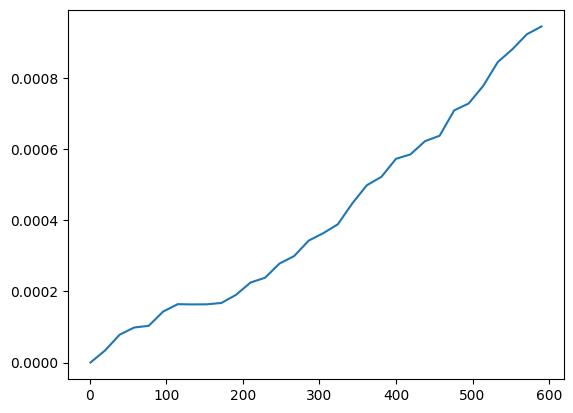

In [14]:
plot_time(genM, cmax, nb_steps=30, nb=100)

In [12]:
def profiles(nb, size): # nombre de noeuds moyen à chaque hauteur
    heights = [0]
    def p(t,h):
        if h == len(heights):
            heights.append(1)
        else:
            heights[h]+=1
        if t!=():
            for st in t[1:]:
                p(st,h+1)
    for _ in range(nb):
        t = genM(size)
        p(t,0)
    return [heights[i]/nb for i in range(len(heights))]

80


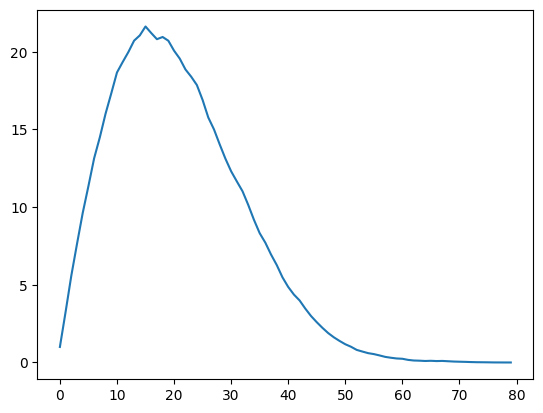

In [13]:
ps = profiles(1000,cmax)
print(len(ps))
plt.plot(ps)
plt.show()